<h1>Laboratorio 5 (Aprendizaje no supervizado) Grupo 1</h1>

<h3>Nombres:</h3>

* Romero Taboada Luis Fernando
* Apaza Guzman Juan Agustin
* Vargas Gonzales Hector Daniel
* Chura Padilla Walberth Jesus
* Coa Veliz Diego Armando

CARRERA: INGENIERIA DE SISTEMAS

# ML - Aprendizaje No Supervisado

Si bien todos los ejemplos de *Machine Learning* que hemos visto hasta ahora en esta serie se han basado en aprendizaje supervisado (nuestros datos van acompañados de las etiquetas correspondientes, ejemplos de la tarea que queremos llevar a cabo) la mayoría de los datos no están etiquetados. Antes esta problemática tenemos dos alternativas: etiquetar datos manualmente (lo cual require de tiempo, esfuerzo y dinero en el caso de querer desarrollar sistemas reales) o bien usar técnicas de aprendizaje no supervisado, o *Unsupervised Learning* en inglés.

## Clustering

De entre las diferentes técnicas de aprendizaje no supervisado, el *Clustering* es una de las más usadas. Este técnica consiste en identificar aquellas muestras similares del conjunto de datos y asignarlas a un *cluster*, o grupo. Esto permite aplicaciones tales como: segmentación de clientes, análisis de datos, reducción de la dimensionalidad, detección de anomalías, aprendizaje semi-supervisado, motores de búsqueda e incluso la semgentación de imágenes.

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

---

Aqui vamos a generar un número aleatorio de clusters (puede generar de 1 a 10 clusters) y con esa cantidad iremos generando los centros y la desviación estandar especificando el punto minimo y maximo, en este caso para los centros nos va a generar en el rango de -3 a 3 y para la deviacion estandar con un rago de 0.1 a 0.5.

Ya teniendo esos datos utilizando el make_blobs generamos en nuestro caso 5000 muestras dispersasndolo en los diferentes centros con su respectiva desviacion estandar para que los puntos no se superpongan

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
n_clusters = np.random.randint(1, 11) # genera numeros aleatorios desde 1 al 10
blob_centers = np.random.uniform(low=-3, high=3, size=(n_clusters, 2)) # generamos un arreglo de los centroides
blob_std = np.random.uniform(low=0.1, high=0.5, size=n_clusters) # generamos un array para la desviacion estandar con valores minimos para que no se superpongan

X, y = make_blobs(n_samples=5000, centers=blob_centers, cluster_std=blob_std, random_state=7)

print(f'Número de clusters: {n_clusters}')
print(blob_centers)
print(blob_std)
X.shape
print(y)

Número de clusters: 5
[[-0.48669558  2.11201522]
 [-0.47909991  1.08809627]
 [ 2.79170769 -2.85711278]
 [-0.55008553 -0.42122231]
 [ 2.25379646  1.83765962]]
[0.32733298 0.44877476 0.13409326 0.22965487 0.44531507]
[4 4 0 ... 1 3 0]


In [2]:
import matplotlib.pyplot as plt
def plot_clusters(X, y=None):
  plt.scatter(X[:, 0],X[:, 1], c=y, s=1)
  plt.xlabel("$x_1$", fontsize=14)
  plt.ylabel("$x_2$", fontsize=14, rotation=0)

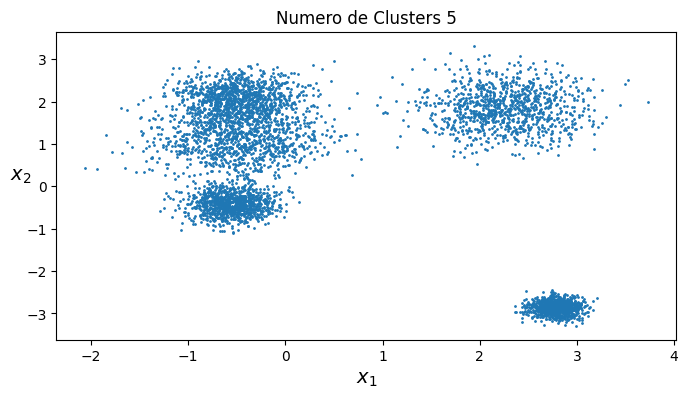

In [3]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.title(f'Numero de Clusters {n_clusters}')
plt.show()

# Uso de K-Means

K-Means es un algoritmo de clustering que se utilliza para agrupar datosen grupos (llamados clústeres) basandose en caracteristicas similares, es uno de los algoritmos de clusteres mas comunes y altamente utilizados en el aprendizaje automático.

In [4]:
from sklearn.cluster import KMeans
"""
recuperamos el numero de clusters que generamos aleatoriamente o ponemos algun número cualquiera ya que no conocemos
el numero de clusters que se van a generar
"""
k = 6

kmeans = KMeans(n_clusters=k, random_state=42) # crea un modelo de K-Means con el numero k de clusteres
y_pred = kmeans.fit_predict(X) # ajusta el modelo  a los datos X y predice a que cluster pertenece cada punto
y_pred.shape

(5000,)

la cantidad de labels es: 5000


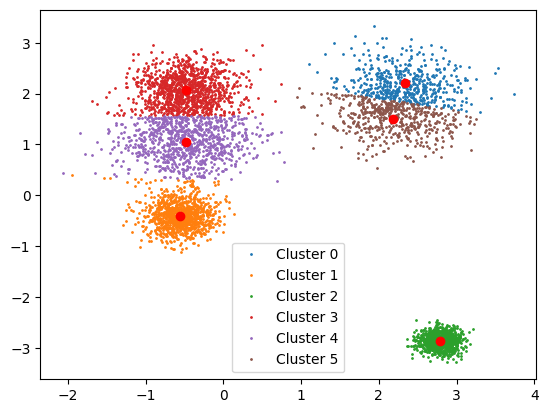

In [5]:
for i in range(k):
    plt.plot(X[y_pred == i, 0], X[y_pred == i, 1], 'o', label="Cluster %d" % i, markersize=1)
    plt.plot(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], 'o', color='red')
    plt.legend()

print("la cantidad de labels es:",len(kmeans.labels_))

# Muestra de los centroides

Mostramos los centroides de los clusteres obtenidos despues de ajustar el modelo KMeans a los datos

In [6]:
kmeans.cluster_centers_

array([[ 2.34122611,  2.20613801],
       [-0.55887594, -0.4001282 ],
       [ 2.79214387, -2.86269778],
       [-0.48634621,  2.08108895],
       [-0.47677713,  1.04518055],
       [ 2.17800257,  1.49336989]])

# Definimos nuevas muestras para predecir sus clusters

In [7]:
X_new = np.array([[0, 2.5], [3, -1], [5, 1], [-2, 3], [2, -1], [0, -1.5]])
y_pred_new = kmeans.predict(X_new)

print(y_pred_new)

[3 2 5 3 2 1]


# Graficamos los puntos originales y mostramos las muestras generadas

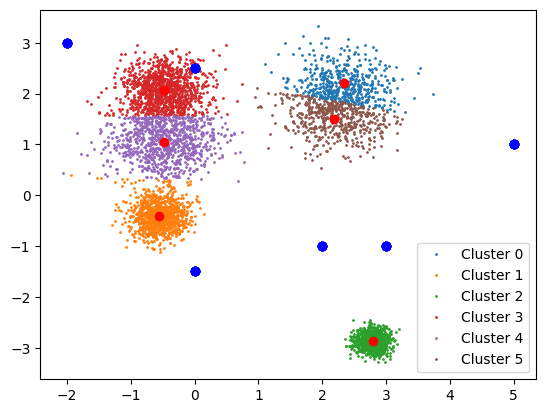

In [8]:
for i in range(k):
    plt.plot(X[y_pred == i, 0], X[y_pred == i, 1], 'o', label="Cluster %d" % i, markersize=1)
    plt.plot(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], 'o', color='red')
    plt.plot(X_new[:, 0], X_new[:, 1], 'o', color='blue')
    plt.legend()

In [9]:
i = 0
for y in y_pred_new:
  print(f'El punto {X_new[i]} pertenece al cluster {y}')
  i += 1

El punto [0.  2.5] pertenece al cluster 3
El punto [ 3. -1.] pertenece al cluster 2
El punto [5. 1.] pertenece al cluster 5
El punto [-2.  3.] pertenece al cluster 3
El punto [ 2. -1.] pertenece al cluster 2
El punto [ 0.  -1.5] pertenece al cluster 1


# Funciones para graficar los siguientes puntos:

* Los datos (<b>plot_data</b>): Realiza un gráfico de dispersión para un conjunto de datos
* Los centroides (<b>plot_centroids</b>): Gráfica los centroides de los clusters
* Los limites de la trama (<b>plot_decision_boundaries</b>): Gráfica los limites de decisión de un algoritmo de Clustering

In [10]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):

    # Verifica sis se proporciono un arreglo de pesos
    if weights is not None:
        # Filtra los centroides, solo se mantendran aquellos cuyos pesos sean mayor al 10% del valor maximo de los pesos
        centroids = centroids[weights > weights.max() / 10]

    # Gráfica circulos para representar los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    # gráfica cruces "x" para representar los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

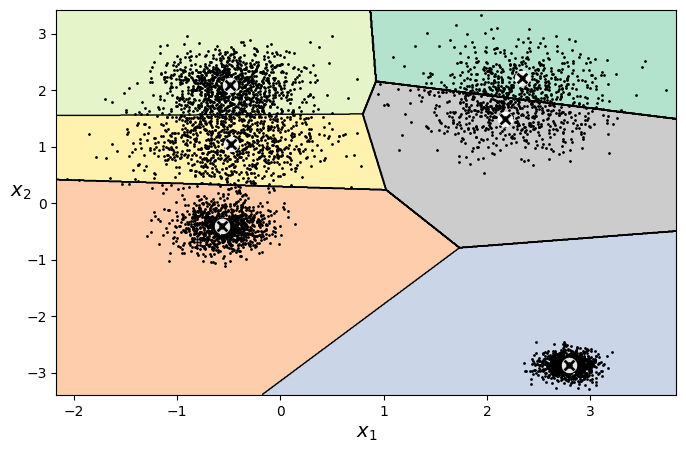

In [11]:
plt.figure(figsize=(8, 5))
plot_decision_boundaries(kmeans, X)
plt.show()

En lugar de asignar un grupo a cada muestra (*hard clustering*) se le puede asignar una puntuación (*soft clustering*) en funcion a su distancia al centroide.

In [12]:
#aplica la transformacion de distancia del modelo K-Means a los nuevos datos X_new
kmeans.transform(X_new)

array([[2.35959628, 2.95348708, 6.0460396 , 0.64188714, 1.53095266,
        2.39937479],
       [3.27311839, 3.60907802, 1.8742591 , 4.65271093, 4.03370087,
        2.62537106],
       [2.91956289, 5.73249166, 4.44916429, 5.59184657, 5.47696348,
        2.86480075],
       [4.41321436, 3.69292707, 7.57204517, 1.7707471 , 2.47821044,
        4.44135563],
       [3.22424506, 2.62824889, 2.02413807, 3.95916994, 3.21203805,
        2.49971565],
       [4.38369692, 1.23371807, 3.10692977, 3.6139633 , 2.58945177,
        3.70188581]])

Este algoritmo funciona asignando centroides de manera aleatoria y de manera iterativa, asigna cada instancia a uno de ellos (el mas cercano) tras lo cual se recalcula el centroide como el valor promedio de todas las instancias asignadas al grupo

In [13]:
# Creamos instancias para KMeans con diferentes configuraciones para el numero de iteraciones maximas del algoritmo
"""
n_clusters=k  ->  definimos el numero de clusters que queremos generar
init="random" ->  establece que los centroides iniciales se seleccionaran de manera aleatoria
n_init=1      ->  especifica cuantas veces se reiniciara el algoritmo con diferentes centroides iniciales
algorithm="elkan" ->  vision optimizada del algoritmo estandar que acelera los calculos utilizando la propiedad triangular de las distancias
max_iter=1000,2000,3000 ->  configuramos el numero de iteraciones maximas del algoritmo
random_state=1 ->  establecemos una semilla para que los resultados sean reproducibles
"""
kmeans_iter1 = KMeans(n_clusters=k, init="random", algorithm="elkan", max_iter=1000, random_state=1)
kmeans_iter2 = KMeans(n_clusters=k, init="random", algorithm="elkan", max_iter=2000, random_state=1)
kmeans_iter3 = KMeans(n_clusters=k, init="random", algorithm="elkan", max_iter=3000, random_state=1)

# Entrenamos los modelos K-Means
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='elkan', init='random', max_iter=3000, n_clusters=6,
       random_state=1)

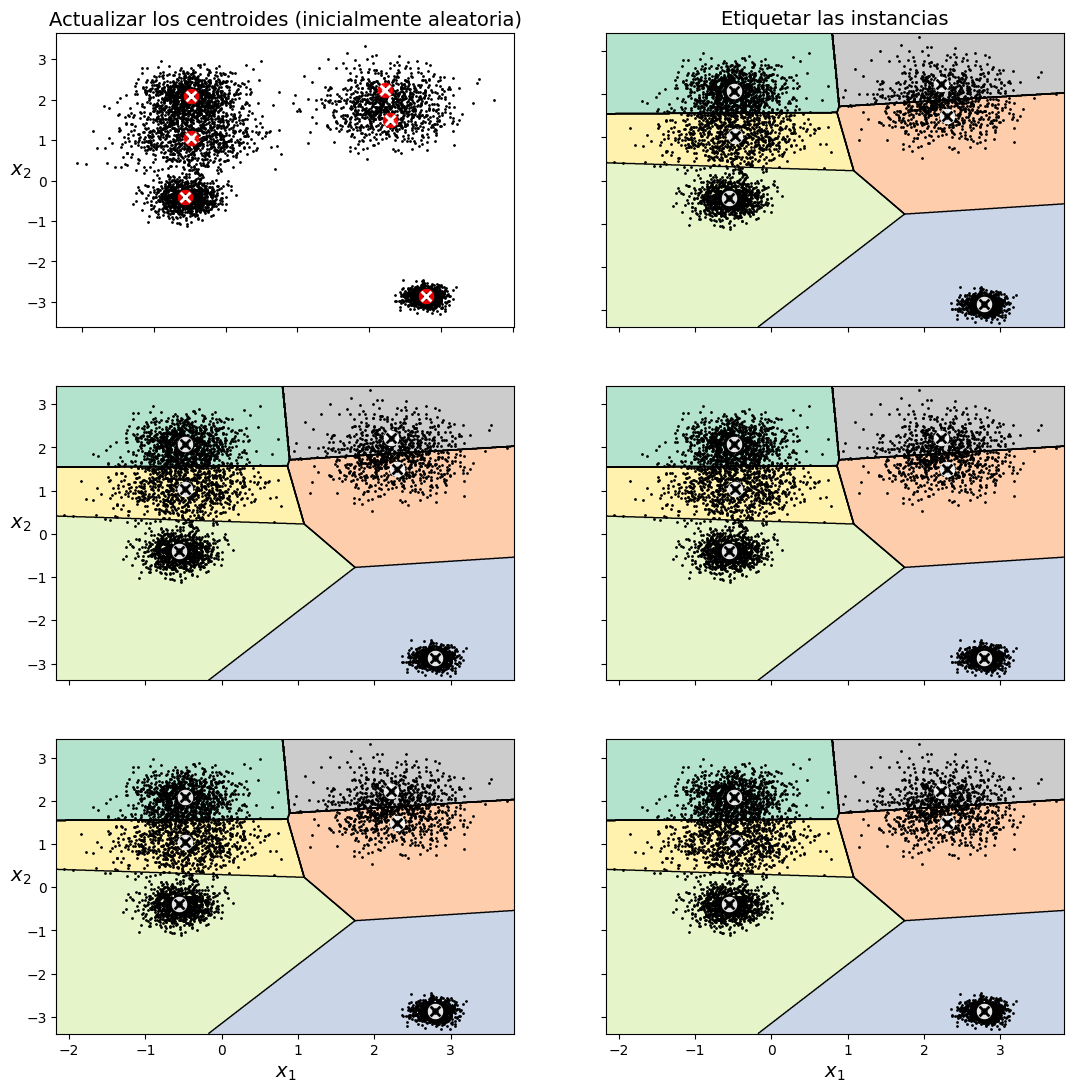

In [14]:
plt.figure(figsize=(13, 13))

plt.subplot(321) # especifica 3 filas, 2 columnas y 1 la pocision en la figura
plot_data(X) # gráfica la dispersión del conjunto de datos
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w') # gráfica los centroides de los clusteres
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Actualizar los centroides (inicialmente aleatoria)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False) # Gráfica los limites de decisión de un algoritmo de Clustering
plt.title("Etiquetar las instancias", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

Esto implica que en función del estado inicial, el algoritmo puede llegar a una solucion u otra

In [15]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    # Entrenamos los modelos K-Means
    clusterer1.fit(X)
    clusterer2.fit(X)
    # Graficamos los modelos
    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

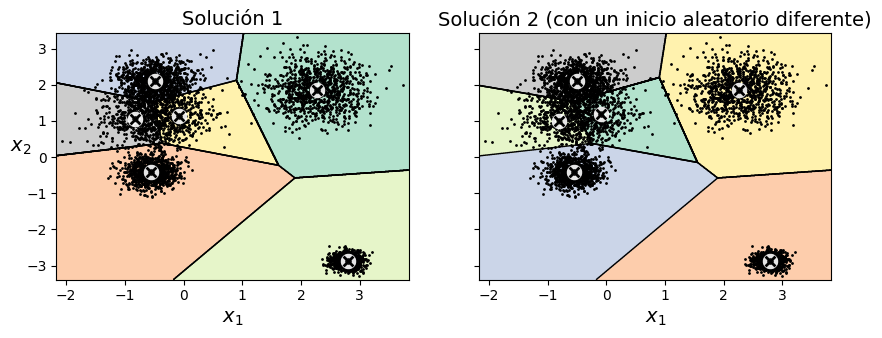

In [16]:
# Crear dos instancias de KMeans con diferentes configuraciones de inicializacion aleatoria y algoritmo "elkan"
kmeans_rnd_init1 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="elkan", random_state=19)

# Utilizando la función "plot_clusterer_comparison" comparamos las soluciones de clustering
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,"Solución 1", "Solución 2 (con un inicio aleatorio diferente)")

# Mostrar los gráficos
plt.show()

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece *Scikit-Learn* por defecto.

In [17]:
# creamos un modelo KMeans especificando que se reiniciara 10 veces el algoritmo con diferentes centroides iniciales
kmeans_rnd_10_inits = KMeans(n_clusters=k, init="random", n_init=10, algorithm="elkan", random_state=11)

# Entrenamos el modelo K-Means
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=6, n_init=10,
       random_state=11)

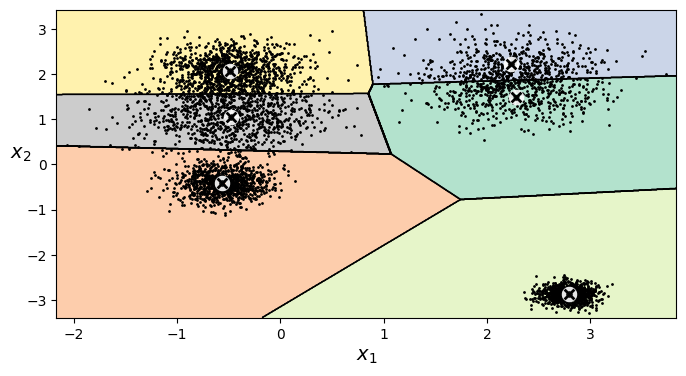

In [18]:
# Graficamos el modelo K-Means
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

# Funcion para la creacion de lotes

El algoritmo de *mini-batch K-Means* es más rápido que *K-Means* normal, pero su precisión suele ser peor.

In [19]:
def load_next_batch(batch_size):
  indices = np.random.choice(len(X), size=batch_size) # elige aleatoriamente indices de X sin reemplazo
  return X[indices] # retorna los indices seleccionado

Esta funcion *load_next_batch* se utiliza para cargar un lote aleatorio de datos de tamaño *batch_size* de la matriz X, es util para entrenar modelos de aprendizaje automático utilizando el metodo de descenso de gradiente estocástico (SGD) o para procesar grandes conjuntos de datos de lotes durante el entrenamiento.

In [20]:
from sklearn.cluster import MiniBatchKMeans

# definimos los parametros
k = 6  # numero de clusters
n_init = 10 # número de inicializaciones diferentes
n_iterations = 1000  # número máximo de iteraciones por inicialización
batch_size = 100  # tamaño del lote utilizado en cada iteración
init_size = 500 # tamaño del lote inicial para ajustar parcialmente el modelo
evaluate_on_last_n_iters = 10 # número de ultimas iteraciones utilizadas para evaluar el modelo

best_kmeans = None # para almacenar el mejor modelo encontrado

# bucle para realizar multiples inicializaciones y seleccionar el mejor modelo
for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size) #crea una instancia de MiniBatchKMeans pasandole los parametros especificos
    X_init = load_next_batch(init_size) # cargamos un lote inicial que utilizaremos para ajustar el modelo parcialmente
    minibatch_kmeans.partial_fit(X_init) # ajustar el modelo parcialmente

    minibatch_kmeans.sum_inertia_ = 0 # inicializa una suma

    # bucle para ajustar el modelo por lotes durante un numero fijo de iteraciones
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size) # cargamos un lote de datos para ajustar parcialmente el modelo
        minibatch_kmeans.partial_fit(X_batch) # ajusta el modelo parcialmente

        # calcula y acumula la inercia en las ultimas iteraciones
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    # Actualiza el mejor modelo encontrado hasta el momento
    if (best_kmeans is None or minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [21]:
# calculamos la puntuacion del modelo "best_kmeans" aplicado a los datos "X"
print(best_kmeans.score(X))

# visualizar los centroides del modelo "best_kmeans"
print(best_kmeans.cluster_centers_)

-893.8773324481417
[[ 2.79179453 -2.86292633]
 [-0.47466056  1.0455426 ]
 [ 2.21082243  1.43824361]
 [-0.55934888 -0.39954323]
 [-0.492085    2.07836924]
 [ 2.31011122  2.16536058]]


# Encontramos el número optimo de grupos

Como hemos visto anteriormente, el número de grupos o *clusters* es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el *silhouette score*, que se basa en calcular el coeficiente de silueta (*silhouette coefficient*) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos. Su valor se encuentra entre $1$ y $-1$. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

In [22]:
from sklearn.metrics import silhouette_score

# calcular el coeficiente de silueta para evaluar la cantidad de los clústeres
silhouette_score(X, kmeans.labels_)

0.5688183761776682

El coeficiente de silueta se utiliza para evaluar la cantidad de agrupación. Un valor de coeficiente de silueta cercano a 1 indica una buena separación entre los clusteres y una mala separacione entre los diferentes clusteres, mientras que un valor cercano a -1 indica qeu las muestras pueden estar asignadas al grupo incorrecto. Un número cercano a 0 indica qeu las muestras están cerca de la frontera entre los clústeres.

---

Calculando la métrica para diferentes números de clusters podemos encontrar el valor óptimo

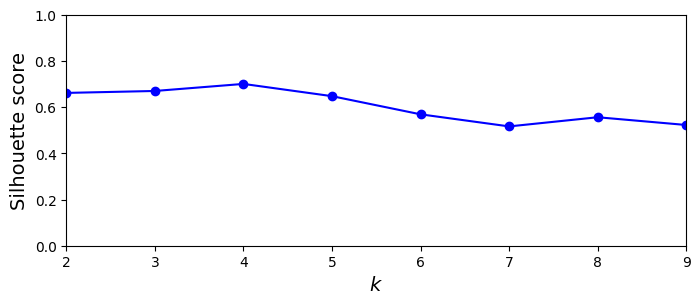

In [23]:
# Crea una lista de modelos KMeans ajustados para diferentes números de clusters (de 1 a n)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]] # calculamos el coeficiente de silueta para cada modelo KMeans (Excepto el primero)

plt.figure(figsize=(8, 3))

# gráficar el coeficiente de silueta en funcion del número de clusters (de 2 a n)
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#  [x_min, x_max, y_min, y_max]
plt.axis([2, 9, 0, 1]) # establece el limite de los ejes de "x" e "y" para enfocar su visualización en un rango específico
plt.show()

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

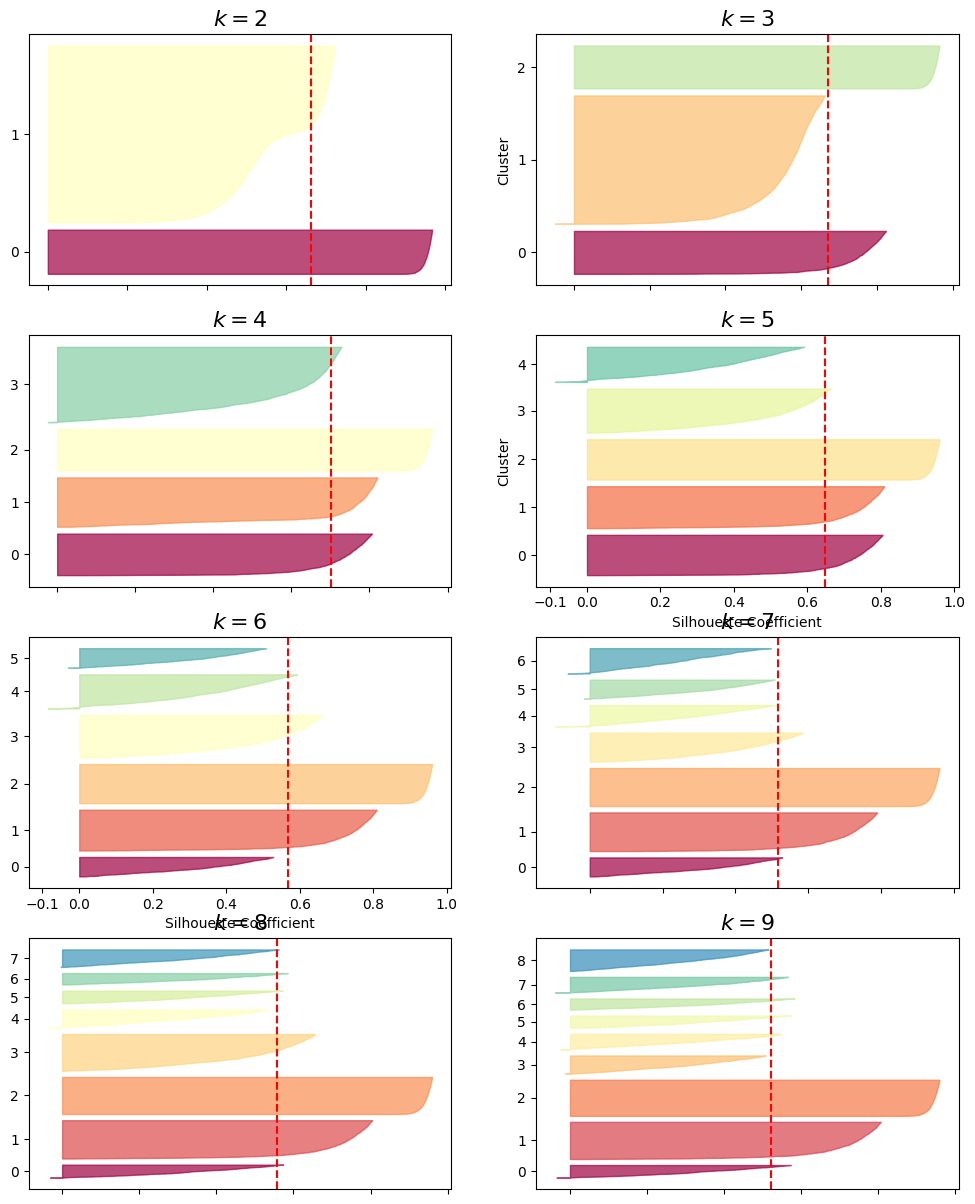

In [24]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(12, 15))

# Iterar sobre diferentes valores de k (número de clusters) para crear subplots
for k in (2, 3, 4, 5, 6, 7, 8, 9):
    # Crear subplots en una cuadrícula de 3 filas y 2 columnas, la posición es k-2 (para acomodar el primer subplot en 1)
    plt.subplot(4, 2, k - 1)

    # Obtener las etiquetas predichas por el modelo de KMeans para el valor actual de k
    y_pred = kmeans_per_k[k - 1].labels_

    # Calcular los coeficientes de silueta para cada muestra del conjunto de datos X y las etiquetas y_pred
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30 # Espacio entre clusters en el gráfico
    pos = padding  # Posición inicial para dibujar el primer clúster
    ticks = []  # Lista para almacenar la posición de las etiquetas del eje Y

    # Iterar sobre cada clúster
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i] # Seleccionar los coeficientes de silueta para el cluster i
        coeffs.sort() # Ordenar los coeficientes de silueta

        color = mpl.cm.Spectral(i / k) # Asignar un color al área de relleno según el cluster

        # Dibujar un área sombreada para representar los coeficientes de silueta del clúster actual
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Agregar la posición del tick para el clúster actual
        ticks.append(pos + len(coeffs) // 2)

        # Actualizar la posición para el siguiente clúster (se suma el padding)
        pos += len(coeffs) + padding

    # Configurar el eje Y para que muestre etiquetas correspondientes a cada clúster
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    # Configuración de etiquetas en los ejes
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False) # Ocultar etiquetas del eje X para subplots que no sean k=5 o k=6

    # Dibujar una línea roja discontinua que representa el coeficiente de silueta promedio para cada valor de k
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")

    # Configurar el título del subplot
    plt.title("$k={}$".format(k), fontsize=16)

# Mostrar todos los gráficos generados.
plt.show()


#Parte 2

## K-Means para aprendizaje semi-supervisado.

realizamos la conexion ala base de datos

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


realizamos las importaciones necesarias para este parte

In [26]:
from sklearn.datasets import make_blobs  # Importa la función make_blobs para generar conjuntos de datos simulados con una distribución específica.
import numpy as np  # Importa la biblioteca NumPy para manejar matrices y vectores (cálculos numéricos eficientes).

# used for manipulating directory paths
import os  # Importa la biblioteca os para manipular rutas y directorios del sistema de archivos.

# Importa pyplot desde la biblioteca matplotlib, que se utiliza para generar gráficos y visualizaciones.
from matplotlib import pyplot as plt

import pandas as pd  # Importa pandas, una biblioteca para la manipulación y análisis de datos (manejo de tablas y dataframes).

# esta tabulate nos sirve para hacer tablas
from tabulate import tabulate  # Importa la función tabulate para mostrar datos en formato tabular (similar a tablas en texto o terminal).

# tells matplotlib to embed plots within the notebook
#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split  # Importa la función train_test_split para dividir el dataset en conjuntos de entrenamiento y prueba (separación de datos).
# Configura matplotlib para que las gráficas se muestren dentro del notebook (sólo se usa en entornos como Jupyter).
%matplotlib inline

cargamos el dataset

In [27]:
# Cargar el dataset usando pandas leemos el archivo de dataset
data = pd.read_csv('/content/drive/MyDrive/datasets/MisDatasets/smoke_detection_iot.csv')

mostramos el dataset

In [28]:
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


eliminanos la columna 0 que son los id unicos de los registros

In [29]:
data = data.drop(data.columns[0], axis=1)

mostramos como queda el dataset

In [30]:
data

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


### Realizamos la separacion para 80% entrenamiento y 20% pruebas

In [31]:
from sklearn.model_selection import train_test_split


# usamos la libreria train_test_split que nos ayudara a separar el 80% para entrenamiento y 20% para pruebas de los datos.
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

#Eliminamos la columna de Fire Alarm y nos quedamos con las demas columnas para X_test
X_test = test_data.drop(['Fire Alarm'], axis=1).values
# utilizamos la columna de Fire Alarm como las etiquetas
y_test = test_data['Fire Alarm'].values
m_test = len(y_test) # muestra la cantidad de ejemplos que hay en y_test

# realizamos lo mismo que para las pruebas
X_train = train_data.drop(['Fire Alarm'], axis=1).values
y_train = train_data['Fire Alarm'].values
m_train = len(y_train)

# separamos los datos para utilizar simplemente 2000 datos para la aplicacion de la silueta
X_train_subset = X_train[:5000]

en un primer modelo se tiene que no se conoce las etiquetas de nuestro dataset, es decir no se conocen las Y, ni cuantos tipos de clases se tiene en este dataset.

Lo que prosigue es hacer el uso de Kmeans para calcular cual seria el numero optimo de clusters

en este primer ejemplo se hace un calculo dandole un total de 50 clusters

In [32]:
k = n_clusters # cantidad de clusters generados en el punto 1
k

5

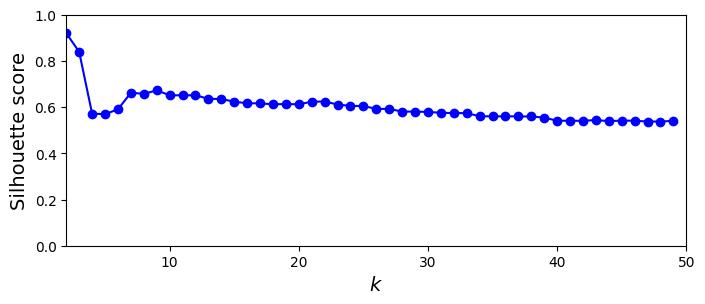

In [33]:
# Genera una lista de modelos KMeans con diferente número de clusters (k) desde 1 hasta 10
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_subset) for k in range(1, 50)]

# Calcula las puntuaciones de silhouette para cada modelo KMeans con k entre 2 y 49.
silhouette_scores = [silhouette_score(X_train_subset, model.labels_) for model in kmeans_per_k[1:]]

# Configuración de la gráfica.
plt.figure(figsize=(8, 3))
plt.plot(range(2, 50), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([2, 50, 0, 1])
plt.show()

In [34]:
# Importamos la clase KMeans del módulo sklearn.cluster para usar el algoritmo de clustering K-means.
from sklearn.cluster import KMeans

# Definimos el número de clusters (grupos) en 10. K significa la cantidad de clusters que queremos generar.
k = 10

# Creamos una instancia del algoritmo KMeans. Aquí le pasamos el número de clusters (k) y un random_state para asegurar que los resultados sean reproducibles.
kmeans = KMeans(n_clusters=k, random_state=42)

# Aplicamos el algoritmo KMeans sobre los datos de entrenamiento (X_train) y guardamos las distancias de cada punto a su centroide más cercano en X_digits_dist.
# La función fit_transform ajusta el modelo y transforma los datos, calculando estas distancias.
X_digits_dist = kmeans.fit_transform(X_train)

# Imprimimos la forma (shape) de la matriz resultante que contiene las distancias. Esto nos indica cuántas filas y columnas tiene el resultado.
print(X_digits_dist)


[[ 20321.92746764 362126.98873185 139028.23609613 ... 369745.86628115
   50032.57562828  21238.22666797]
 [ 25195.26050669 348320.55489161 126057.84170769 ... 355889.71235482
   65862.95007058  33971.7492043 ]
 [  3740.99024324 375971.0102867  153499.14689014 ... 383182.26731413
   39574.94480097   8291.76748347]
 ...
 [ 27958.62543116 392767.85334851 169590.87673575 ... 400040.32500737
   19527.81482911  15932.75468963]
 [  6806.00205701 378055.55502862 155422.65266041 ... 385253.70209253
   36755.78561261   5227.96174431]
 [ 65433.39233144 412748.49787249 193652.72802623 ... 412578.51050194
   51851.59870245  59823.27466798]]


como cada fila, en cada columna es una distancia al centroide, entonces debemos escoger las menor columna de cada columna, dandonos como resultado teniendo los indices mas representativos:

In [35]:
# Utilizamos np.argmin para obtener los índices de los valores mínimos a lo largo del eje 0 (filas).
# Esto nos da los índices de las muestras que están más cerca de cada uno de los centroides de los clusters.
idxs = np.argmin(X_digits_dist, axis=0)

# Imprimimos los índices de las muestras más cercanas a los centroides.
print(idxs)

# Seleccionamos de X_train las muestras cuyos índices coinciden con los valores mínimos (más cercanos a los centroides).
X_representative_digits = X_train[idxs]

# Imprimimos los datos más representativos, es decir, los más cercanos a los centroides de los clusters.
print("Los valores más representativos son", X_representative_digits)

# Imprimimos la cantidad de muestras representativas seleccionadas.
print("La cantidad es: ", len(X_representative_digits))


[16681 42907 23182 26250  9820 36635 25670 35964 16345 33174]
Los valores más representativos son [[ 1.65475389e+09  9.93500000e+00  4.97300000e+01  1.22600000e+03
   4.00000000e+02  1.29620000e+04  1.94300000e+04  9.38732000e+02
   2.20000000e+00  2.29000000e+00  1.51700000e+01  2.36500000e+00
   5.30000000e-02  2.05550000e+04]
 [ 1.65512700e+09  1.41960000e+01  4.30500000e+01  1.95000000e+02
   4.70000000e+02  1.27500000e+04  2.05220000e+04  9.37351000e+02
   1.57000000e+00  1.63000000e+00  1.07900000e+01  1.68200000e+00
   3.80000000e-02  2.69400000e+03]
 [ 1.65490328e+09  3.27400000e+01  2.64700000e+01  1.45600000e+03
   1.81400000e+03  1.28370000e+04  1.90990000e+04  9.31054000e+02
   8.76720000e+02  9.10890000e+02  6.03411000e+03  9.40960000e+02
   2.12590000e+01  2.71000000e+02]
 [ 1.65473729e+09 -4.40000000e-02  5.33200000e+01  1.36000000e+02
   4.00000000e+02  1.32160000e+04  2.00700000e+04  9.39668000e+02
   2.32000000e+00  2.41000000e+00  1.59400000e+01  2.48600000e+00
   5.

El siguiente paso consiste en anotar manualmente estas etiquetas (aquí haremos
trampas ya que disponemos de dichas etiquetas).

In [36]:
# Seleccionamos las etiquetas correspondientes a los índices más representativos en y_train.
y_representative_digits = y_train[idxs]

# Imprimimos las etiquetas de los dígitos más representativos, que corresponden a las muestras más cercanas a los centroides.
print(y_representative_digits)


[1 0 1 1 1 0 1 0 0 1]


Y entrenaremos un modelo clasificador:

In [37]:
# Importamos la clase LogisticRegression del módulo sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Creamos una instancia de LogisticRegression con los parámetros especificados:
# - multi_class="ovr": Utiliza el esquema "uno contra el resto" para clasificación multiclase.
# - solver="lbfgs": Emplea el algoritmo de optimización L-BFGS.
# - max_iter=5000: Establece el número máximo de iteraciones en 5000.
# - random_state=42: Fija la semilla para la generación de números aleatorios, garantizando reproducibilidad.
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Ajustamos el modelo a los datos de entrenamiento más representativos y medimos el tiempo de ejecución.
# El método fit entrena el modelo utilizando las características (X_representative_digits) y las etiquetas (y_representative_digits).
%time log_reg2.fit(X_representative_digits, y_representative_digits)

# Evaluamos el modelo calculando la precisión en el conjunto de prueba.
# El método score devuelve la precisión del modelo en los datos proporcionados.
accuracy = log_reg2.score(X_test, y_test)
print(f'Precisión del modelo en el conjunto de prueba: {accuracy}')

CPU times: user 34.9 ms, sys: 33.9 ms, total: 68.8 ms
Wall time: 38.3 ms
Precisión del modelo en el conjunto de prueba: 0.9353345042311991


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


#### Probando con datos aleatorias

Como puedes observar hemos obtenido una precisión del $93$% habiendo anotado simplemente 50 ejemplos, pero aquellas más representativas.

 Entrenar el mismo modelo con 50 ejemplos aleatorias.

In [38]:
# Importamos la clase LogisticRegression del módulo sklearn.linear_model para crear el modelo de regresión logística.
from sklearn.linear_model import LogisticRegression

# Creamos una instancia de LogisticRegression con los siguientes parámetros:
# - multi_class="ovr": Usamos el esquema "uno contra el resto" (One-vs-Rest) para la clasificación multiclase.
# - solver="lbfgs": Utilizamos el optimizador L-BFGS, eficiente para la regresión logística.
# - max_iter=5000: Se permiten hasta 5000 iteraciones para que el optimizador encuentre una solución adecuada.
# - random_state=42: Usamos una semilla para garantizar que los resultados sean reproducibles.
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Entrenamos el modelo utilizando un subconjunto de los datos de entrenamiento (las primeras 50 muestras de X_train y y_train).
# %time mide el tiempo que tarda en ejecutar el ajuste del modelo.
%time log_reg.fit(X_train[:50], y_train[:50])

# Evaluamos el modelo usando el conjunto de prueba (X_test y y_test) y calculamos la precisión.
# El método score devuelve la precisión del modelo, que es la fracción de predicciones correctas.
accuracy = log_reg.score(X_test, y_test)
print(f'Precisión del modelo en el conjunto de prueba: {accuracy}')


CPU times: user 22.3 ms, sys: 23.4 ms, total: 45.7 ms
Wall time: 24.1 ms
Precisión del modelo en el conjunto de prueba: 0.9609612007025388


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Esto pone de manifiesto que a la hora de entrenar modelos de ML no es tan importante la cantidad de datos, sino la calidad.

Ahora que tenemos un clasificador, podemos usarlo para anotar de manera automática el resto de ejemplos. Para ello asignaremos, en cada grupo, la misma etiqueta a todas las muestras que la muestra representativa.

In [39]:
# Creamos un array vacío con el mismo tamaño que X_train para almacenar las etiquetas propagadas.
y_train_propagated = np.empty(len(X_train))

# Iteramos sobre cada cluster (i) en el rango de 0 a k (el número de clusters).
for i in range(k):
    # Para las muestras en el cluster i, asignamos la etiqueta más representativa de ese cluster.
    # kmeans.labels_ == i selecciona las muestras cuyo cluster asignado es i.
    # y_representative_digits[i] es la etiqueta más representativa para el cluster i.
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]


Creamos un nuevo modelo de regresion logistica:

In [40]:
# Creamos una instancia de LogisticRegression con los siguientes parámetros:
# - multi_class="ovr": Utiliza el esquema "uno contra el resto" para clasificación multiclase.
# - solver="lbfgs": Utiliza el optimizador L-BFGS.
# - max_iter=5000: El número máximo de iteraciones para encontrar la solución.
# - random_state=42: Fija la semilla para asegurar reproducibilidad.
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Entrenamos el modelo usando las primeras 1000 muestras de X_train y las etiquetas propagadas correspondientes.
# %time mide el tiempo que tarda en entrenar el modelo.
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])

# Evaluamos el modelo en el conjunto de prueba X_test y y_test, y mostramos la precisión.
log_reg3.score(X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 61.2 ms, sys: 47.4 ms, total: 109 ms
Wall time: 77.4 ms


0.8959763691521635

## Aprendizaje Activo

El aprendizaje activo (o *Active Learning*) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en los que el modelo tenga más problemas.

In [41]:
#usamos el modelo entrenado, y obtenemos las probabilidades  probabilidades asignadas por un
# modelo de aprendizaje automático a cada una de las posibles clases de salida para una instancia de entrada dada.
probas = log_reg3.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)]) #Zip une los dos arrays
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:2]]

array([0.99342881, 0.99700349])

In [42]:
# Seleccionamos las primeras 1000 muestras de X_train y ordenamos las filas según los índices en sorted_ixs.
# sorted_ixs es un array que contiene índices ordenados, y [:k] selecciona los primeros k índices.
X_lowest = X_train[:1000][sorted_ixs[:k]]

# Imprimimos las muestras seleccionadas más bajas de X_train.
print(X_lowest)


[[1.65490376e+09 3.71900000e+01 1.55600000e+01 0.00000000e+00
  7.69000000e+02 1.31980000e+04 2.08460000e+04 9.30891000e+02
  1.01000000e+00 1.05000000e+00 6.99000000e+00 1.08900000e+00
  2.50000000e-02 7.56000000e+02]
 [1.65512754e+09 1.73610000e+01 4.31500000e+01 2.13000000e+02
  4.50000000e+02 1.27560000e+04 2.04980000e+04 9.37368000e+02
  1.36000000e+00 1.41000000e+00 9.37000000e+00 1.46200000e+00
  3.30000000e-02 3.23400000e+03]
 [1.65512739e+09 2.01160000e+01 4.92900000e+01 2.05000000e+02
  4.46000000e+02 1.27620000e+04 2.05100000e+04 9.37353000e+02
  1.41000000e+00 1.46000000e+00 9.70000000e+00 1.51200000e+00
  3.40000000e-02 3.08200000e+03]
 [1.65512768e+09 1.44680000e+01 4.88300000e+01 2.17000000e+02
  4.47000000e+02 1.27590000e+04 2.05020000e+04 9.37440000e+02
  1.71000000e+00 1.78000000e+00 1.17900000e+01 1.83900000e+00
  4.20000000e-02 3.37100000e+03]
 [1.65512766e+09 1.48820000e+01 4.23100000e+01 1.95000000e+02
  4.31000000e+02 1.27670000e+04 2.05170000e+04 9.37401000e+02


In [43]:
# Seleccionamos las primeras 1000 etiquetas de y_train y usamos los primeros k índices de sorted_ixs
# para extraer las etiquetas correspondientes a las muestras que fueron clasificadas como "más bajas".
y_lowest = y_train[:1000][sorted_ixs[:k]]

# Mostramos el array de etiquetas seleccionadas.
y_lowest


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
# Creamos una copia de las primeras 1000 etiquetas de y_train_propagated para evitar modificar el array original.
y_train2 = y_train_propagated[:1000].copy()

# Asignamos los valores de y_lowest a las posiciones indicadas por los primeros k índices de sorted_ixs en y_train2.
# Esto reemplaza las etiquetas en esas posiciones con las correspondientes a las muestras "más bajas".
y_train2[sorted_ixs[:k]] = y_lowest


In [45]:
# Creamos una instancia de LogisticRegression con los siguientes parámetros:
# - multi_class="ovr": Utiliza el enfoque "uno contra el resto" para clasificación multiclase.
# - solver="lbfgs": Utiliza el optimizador L-BFGS.
# - max_iter=5000: Establece el número máximo de iteraciones para el algoritmo de optimización.
# - random_state=42: Fija la semilla para asegurar reproducibilidad de los resultados.
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Entrenamos el modelo usando las primeras 1000 muestras de X_train y las etiquetas modificadas y_train2.
# %time mide el tiempo que tarda en entrenar el modelo.
%time log_reg5.fit(X_train[:1000], y_train2)

# Evaluamos el modelo en el conjunto de prueba X_test y y_test, y mostramos la precisión.
log_reg5.score(X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 48.4 ms, sys: 28.7 ms, total: 77 ms
Wall time: 40.6 ms


0.8959763691521635

## Otras técnicas de aprendizaje no supervisado

Otras técnicas muy usadas de aprendizaje no supervisado son

### DBSCAN

Este algoritmo define *clusters* como regiones continuas de alta densidad, agrupando progresivamente muestras cercanas entre ellas.

In [46]:
# Importaciones necesarias
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

###Montamos Google Drive

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Cargamos el dataset y los mostramos

In [48]:
data = pd.read_csv('/content/drive/MyDrive/datasets/MisDatasets/covtype.csv')
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


Por motivos de que el dataset es muy grande separamos el 80% para entrenamiento y 20% pruebas, por lo cual simplemente utilizaremos las pruebas para realizar el ejercicio

In [49]:
from sklearn.model_selection import train_test_split

# usamos la libreria train_test_split que nos ayudara a separar el 80% para entrenamiento y 20% para pruebas de los datos.
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

X = test_data.drop(['Cover_Type'], axis=1) # eliminamos la columna de "Cover_Type" y nos queda todas las demas columnas para X
y = test_data['Cover_Type']
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
250728,3351,206,27,726,124,3813,192,252,180,2271,...,0,0,0,0,0,0,0,1,0,0
246788,2732,129,7,212,1,1082,231,236,137,912,...,0,0,0,0,0,0,0,0,0,0
407714,2572,24,9,201,25,957,216,222,142,2191,...,0,0,0,0,0,0,0,0,0,0
25713,2824,69,13,417,39,3223,233,214,110,6478,...,0,0,0,0,0,0,0,0,0,0
21820,2529,84,5,120,9,1092,227,231,139,4983,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409774,2589,11,14,216,11,1064,204,210,141,2430,...,0,0,0,0,0,0,0,0,0,0
133846,2935,325,8,331,79,3042,201,232,170,2326,...,0,0,0,0,0,0,0,0,0,0
155608,2882,180,14,60,10,3209,224,248,152,2809,...,0,0,0,0,0,0,0,0,0,0
111403,2991,159,13,402,75,5434,233,242,137,1504,...,0,0,0,0,0,0,0,0,0,0


### Realizamos la normalización de los datos para mantenerlo en un misma escala que sera entre 0 y 1.

In [50]:
# Normalizamos los datos
X_norm = (X - X.min()) / (X.max() - X.min())
X_norm

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
250728,0.748231,0.572222,0.415385,0.524946,0.385214,0.538027,0.755906,0.992126,0.711462,0.316648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
246788,0.435288,0.358333,0.107692,0.153290,0.225681,0.152674,0.909449,0.929134,0.541502,0.127161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407714,0.354398,0.066667,0.138462,0.145336,0.256809,0.135036,0.850394,0.874016,0.561265,0.305494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25713,0.481800,0.191667,0.200000,0.301518,0.274968,0.454776,0.917323,0.842520,0.434783,0.903235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21820,0.332659,0.233333,0.076923,0.086768,0.236057,0.154085,0.893701,0.909449,0.549407,0.694785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409774,0.362993,0.030556,0.215385,0.156182,0.238651,0.150134,0.803150,0.826772,0.557312,0.338818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133846,0.537917,0.902778,0.123077,0.239335,0.326848,0.429237,0.791339,0.913386,0.671937,0.324317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155608,0.511122,0.500000,0.215385,0.043384,0.237354,0.452801,0.881890,0.976378,0.600791,0.391662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111403,0.566229,0.441667,0.200000,0.290672,0.321660,0.766756,0.917323,0.952756,0.541502,0.209704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Reducimos la dimensionalidad a simplemente 2 componentes que en este caso llegarian a ser ($x_1$, $x_2$)

In [51]:
pca = PCA(n_components=2) # especificamos el numero de componentes al que deseamos reducir
X_reduced = pca.fit_transform(X_norm) # ajustamos el modelo PCA al conjunto de datos normalizados

In [52]:
X_reduced

array([[ 0.58178453, -0.0973087 ],
       [-0.70724218,  0.10520037],
       [-0.70398302,  0.14419806],
       ...,
       [ 0.95891871,  0.33892136],
       [ 0.9809729 ,  0.42571659],
       [-0.64353832,  0.26007607]])

### Aplicamos DBSCAN con diferentes valores de "eps".

In [53]:
dbscan = DBSCAN(eps=0.02, min_samples=5) # aplicamos un maximo de distancia de 0.02 y un minimo de ejemplos de 5
dbscan.fit(X_reduced) # Entrenamos el modelo

DBSCAN(eps=0.02)

Mostramos los labels del modelo, donde nos muestra los numeros de clusters, el -1 se representa como ruido o no asignado a ningun cluster

In [54]:
dbscan_labels_1 = np.unique(dbscan.labels_)
dbscan_labels_1

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [55]:
dbscan2 = DBSCAN(eps=0.08) # aplicamos un maximo de distancia de 0.08 y un minimo de ejemplos por defecto de 5
dbscan2.fit(X_reduced) # Entrenamos el modelo

DBSCAN(eps=0.08)

In [56]:
dbscan_labels_2 = np.unique(dbscan2.labels_)
dbscan_labels_2

array([0, 1, 2, 3, 4])

### Aplicamos la función para la visualización del modelo

In [57]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], s=1, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=10)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.3f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Graficamos los resultados

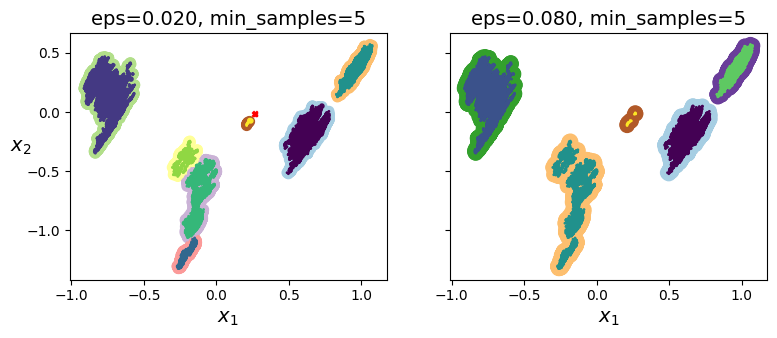

In [58]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X_reduced, size=50)

plt.subplot(122)
plot_dbscan(dbscan2, X_reduced, size=100, show_ylabels=False)

plt.show()

Podemos considerar las muestras fuera de los grupos como anomalías, o bien usar un clasificador de vecinos cercanos para clasificar nuevas muestras.

In [59]:
knn = KNeighborsClassifier(n_neighbors=10) # Creamos un clasificador KNN con 10 vecinos cercanos para considerar un grupo
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_]) # Entrenamos los componentes(centros de un grupo) y las etiquetas asignadas a cada punto central

KNeighborsClassifier(n_neighbors=10)

In [60]:
X_new = np.array([[0.5, 0], [0.75, 0.5],[0, 0.47], [-0.8, -0.7], [0, -1]]) # Agregamos nuevos puntos para predecir a que grupo pertenece
print("Predicción de etiquetas para nuevos puntos: \n", knn.predict(X_new),"\n")
print("Probabilidades de pertenencia: \n", knn.predict_proba(X_new))

Predicción de etiquetas para nuevos puntos: 
 [0 3 4 1 2] 

Probabilidades de pertenencia: 
 [[1.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0. ]
 [0.  0.4 0.  0.  0.6]
 [0.  1.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]]


# Funciones para graficar los siguientes puntos:

* Los datos (<b>plot_data</b>): Realiza un gráfico de dispersión para un conjunto de datos
* Los centroides (<b>plot_centroids</b>): Gráfica los centroides de los clusters
* Los limites de la trama (<b>plot_decision_boundaries</b>): Gráfica los limites de decisión de un algoritmo de Clustering

In [61]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):

    # Verifica sis se proporciono un arreglo de pesos
    if weights is not None:
        # Filtra los centroides, solo se mantendran aquellos cuyos pesos sean mayor al 10% del valor maximo de los pesos
        centroids = centroids[weights > weights.max() / 10]

    # Gráfica circulos para representar los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    # gráfica cruces "x" para representar los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

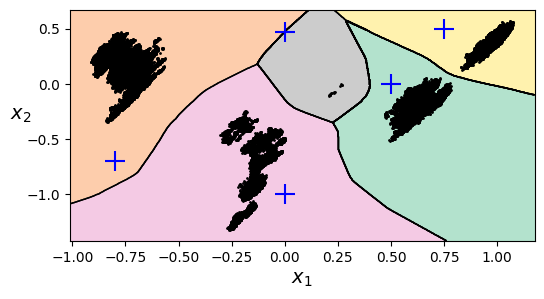

In [62]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X_reduced, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

# Gaussian Mixtures

Los modelos de *Gaussian Mixtures* son modelos probabilísticos que asumen que las muestras del conjunto de datos provienen de la mezcla de distribuciones Gaussianas cuyos parámetros son desconocidos.

In [63]:
# Importaciones necesarias
import numpy as np
import pandas as pd
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Cargamos el dataset

In [64]:
data = pd.read_csv('/content/drive/MyDrive/datasets/MisDatasets/covtype.csv')
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


Por motivos de que el dataset es muy grande separamos el 80% para entrenamiento y 20% pruebas, por lo cual simplemente utilizaremos las pruebas para realizar el ejercicio

In [65]:
from sklearn.model_selection import train_test_split

# usamos la libreria train_test_split que nos ayudara a separar el 80% para entrenamiento y 20% para pruebas de los datos.
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

X = test_data.drop(['Cover_Type'], axis=1) # eliminamos la columna de "Cover_Type" y nos queda todas las demas columnas para X
y = test_data['Cover_Type']
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
250728,3351,206,27,726,124,3813,192,252,180,2271,...,0,0,0,0,0,0,0,1,0,0
246788,2732,129,7,212,1,1082,231,236,137,912,...,0,0,0,0,0,0,0,0,0,0
407714,2572,24,9,201,25,957,216,222,142,2191,...,0,0,0,0,0,0,0,0,0,0
25713,2824,69,13,417,39,3223,233,214,110,6478,...,0,0,0,0,0,0,0,0,0,0
21820,2529,84,5,120,9,1092,227,231,139,4983,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409774,2589,11,14,216,11,1064,204,210,141,2430,...,0,0,0,0,0,0,0,0,0,0
133846,2935,325,8,331,79,3042,201,232,170,2326,...,0,0,0,0,0,0,0,0,0,0
155608,2882,180,14,60,10,3209,224,248,152,2809,...,0,0,0,0,0,0,0,0,0,0
111403,2991,159,13,402,75,5434,233,242,137,1504,...,0,0,0,0,0,0,0,0,0,0


Realizamos la normalización de los datos para mantenerlo en un misma escala que sera entre 0 y 1.

In [66]:
# Normalizamos los datos
X_norm = (X - X.min()) / (X.max() - X.min())
X_norm

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
250728,0.748231,0.572222,0.415385,0.524946,0.385214,0.538027,0.755906,0.992126,0.711462,0.316648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
246788,0.435288,0.358333,0.107692,0.153290,0.225681,0.152674,0.909449,0.929134,0.541502,0.127161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407714,0.354398,0.066667,0.138462,0.145336,0.256809,0.135036,0.850394,0.874016,0.561265,0.305494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25713,0.481800,0.191667,0.200000,0.301518,0.274968,0.454776,0.917323,0.842520,0.434783,0.903235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21820,0.332659,0.233333,0.076923,0.086768,0.236057,0.154085,0.893701,0.909449,0.549407,0.694785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409774,0.362993,0.030556,0.215385,0.156182,0.238651,0.150134,0.803150,0.826772,0.557312,0.338818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133846,0.537917,0.902778,0.123077,0.239335,0.326848,0.429237,0.791339,0.913386,0.671937,0.324317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155608,0.511122,0.500000,0.215385,0.043384,0.237354,0.452801,0.881890,0.976378,0.600791,0.391662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111403,0.566229,0.441667,0.200000,0.290672,0.321660,0.766756,0.917323,0.952756,0.541502,0.209704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Reducimos la dimensionalidad a simplemente 2 componentes que en este caso llegarian a ser ($x_1$, $x_2$)

In [67]:
pca = PCA(n_components=2) # especificamos el numero de componentes al que deseamos reducir
X_reducido = pca.fit_transform(X_norm) # ajustamos el modelo PCA al conjunto de datos normalizados
X_reducido

array([[ 0.58178453, -0.0973087 ],
       [-0.70724218,  0.10520037],
       [-0.70398302,  0.14419806],
       ...,
       [ 0.95891871,  0.33892136],
       [ 0.9809729 ,  0.42571659],
       [-0.64353832,  0.26007607]])

Aplicamos la función plot_clusters para la visualización del modelo

In [68]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

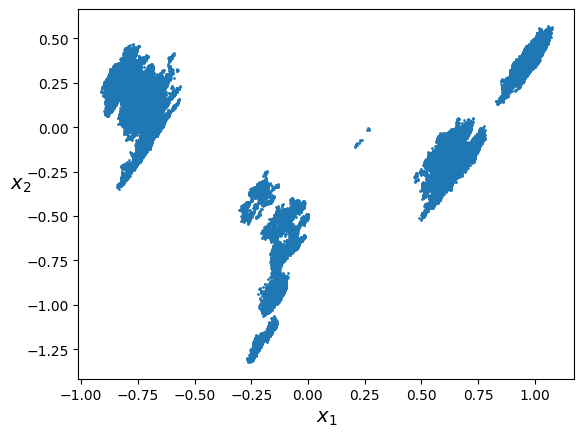

In [69]:
plot_clusters(X_reducido)

### Creamos el modelo de GAUSSIAN MIXTURE

In [70]:
# especificamos el número de componentes(grupos) y se actualizara 10 veces el algoritmo
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X_reducido) # Entrenamos el modelo

GaussianMixture(n_components=3, n_init=10, random_state=42)

### Creamos la función de plot_gaussian_mixture para visualizar el modelo

In [71]:
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

<ipython-input-71-ae367e1f6250>:9: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12))
<ipython-input-71-ae367e1f6250>:10: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), linewidths=1, colors='k')


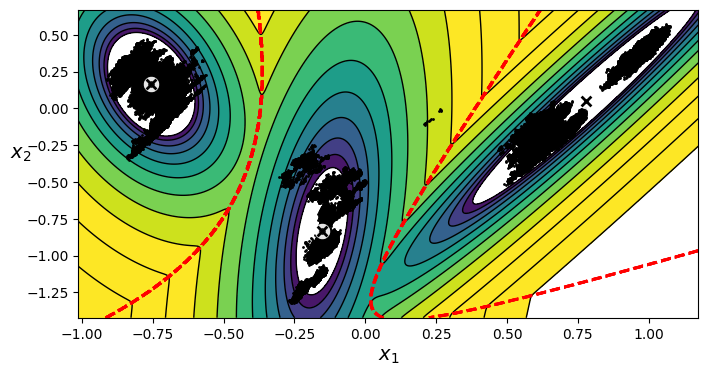

In [72]:
# Graficamos los resultados
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X_reducido)
plt.show()

### Propiedades del modelo Gaussian Mixture

In [73]:
print("Pesos del modelo: \n", gm.weights_) # Mientras mas peo tengan, son mas representativos

Pesos del modelo: 
 [0.43841381 0.44704526 0.11454093]


In [74]:
print("Medias del modelo: \n" , gm.means_) # representan a los centros de cada componente de la mezcla gaussiana

Medias del modelo: 
 [[-0.75561239  0.16415928]
 [ 0.78011293  0.05263195]
 [-0.15256448 -0.83375046]]


In [75]:
print("Covarianzas del modelo: \n", gm.covariances_) # definimos la forma de cada componente gaussiano en el espacio de caracteristicas

Covarianzas del modelo: 
 [[[ 0.00378531 -0.0029172 ]
  [-0.0029172   0.01964497]]

 [[ 0.0287829   0.04902556]
  [ 0.04902556  0.08837376]]

 [[ 0.00366857  0.0071471 ]
  [ 0.0071471   0.08148347]]]


### Predicciones

In [76]:
# de la mezcla gaussiana generamos predicciones para cada punto en conjunto
predicciones = gm.predict(X_reducido)
predicciones

array([1, 0, 0, ..., 1, 1, 0])

### Probabilidades

In [77]:
# nos genera las probabilidades de pertenecer a uno de los componentes del modelo
probabilidades = gm.predict_proba(X_reducido)
probabilidades

array([[1.08279726e-108, 1.00000000e+000, 4.85950706e-033],
       [1.00000000e+000, 1.17033045e-315, 8.88392472e-033],
       [1.00000000e+000, 2.47032823e-323, 5.65511360e-033],
       ...,
       [6.91432481e-197, 1.00000000e+000, 1.77329934e-077],
       [3.57814942e-205, 1.00000000e+000, 4.81570334e-080],
       [1.00000000e+000, 4.94065646e-324, 3.04929259e-028]])

Estos modelos son generativos, por lo que permiten crear nuevas muestras.

In [78]:
# creamos nuevas muestras que sigan la distribución ajustada del modelo
X_new, y_new = gm.sample(5)
print(f"Muestras generadas: \n {X_new} \n")
print(f"Componente al que pertenece: \n {y_new}")

Muestras generadas: 
 [[-0.6860517   0.26996865]
 [-0.762955    0.12907806]
 [ 0.49324435 -0.40298017]
 [-0.13508797 -0.9704465 ]
 [-0.19008999 -0.96369364]] 

Componente al que pertenece: 
 [0 0 1 2 2]


Definiendo un valor límite podemos detectar anomalías en los datos.

In [79]:
densidades = gm.score_samples(X_reducido) # devuelve un array que contienen las densidades de porbabilidad
density_threshold = np.percentile(densidades, 4) # nos devuelve el umbral de Densidades
anomalies = X_reducido[densidades < density_threshold] # Selecciona los datos que tienen la densidad menor que el umbral
anomalies.shape

(4649, 2)

<ipython-input-71-ae367e1f6250>:9: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12))
<ipython-input-71-ae367e1f6250>:10: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), linewidths=1, colors='k')


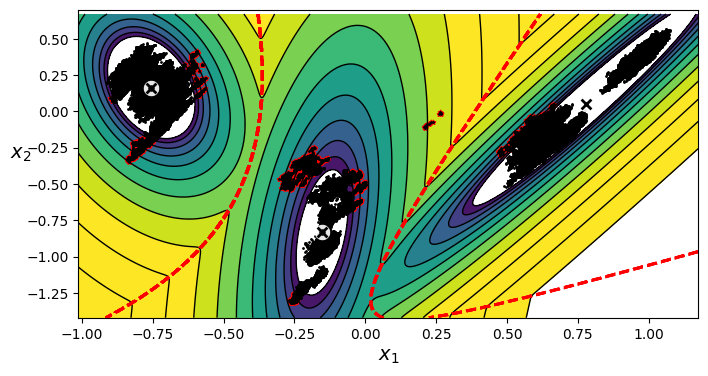

In [80]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X_reducido)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', s=10, marker='*')
plt.ylim(top=0.7)
plt.show()

### Aplicamos el modelo de Bayesian Gaussian Mixture

Una alternativa muy usada para seleccionar el número de grupos óptimos es el uso de *Bayesian Gaussian Mixtures*, ya que pueden asignar pesos cercanos a 0 a grupos innecesarios.

In [81]:
# especificamos el número de componentes(grupos) y se actualizara 10 veces el algoritmo
bgm = BayesianGaussianMixture(n_components=5, n_init=10, random_state=42)
bgm.fit(X_reducido)

BayesianGaussianMixture(n_components=5, n_init=10, random_state=42)

In [82]:
# Muestra los pesos, mientras mas alto es mas representativo
print("Pesos del modelo Bayesian Gaussian Mixture: \n", np.round(bgm.weights_, 2))

Pesos del modelo Bayesian Gaussian Mixture: 
 [0.2  0.29 0.25 0.11 0.15]


<ipython-input-71-ae367e1f6250>:9: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12))
<ipython-input-71-ae367e1f6250>:10: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), linewidths=1, colors='k')


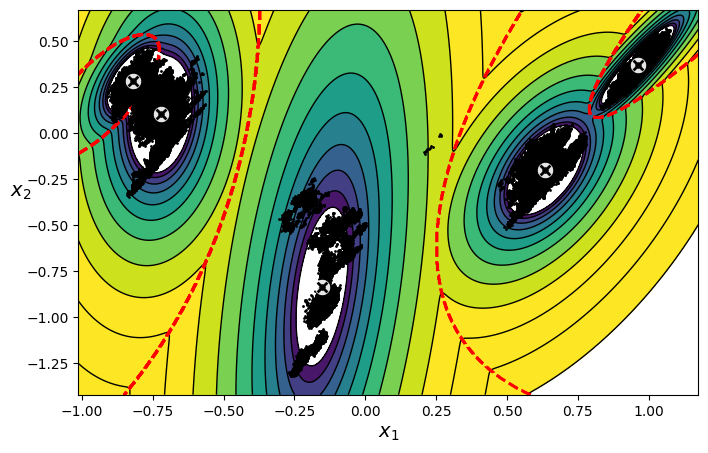

In [83]:
# Graficamos los resultados
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X_reducido)
plt.show()